In [3]:
import numpy as np
import pandas as pd
import keras
import seaborn as sns
import os
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import random as rd
import sklearn
import matplotlib.pyplot as plt 


from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Input, Lambda, Dense, Flatten, Dropout, Activation, Conv2D, BatchNormalization, MaxPooling2D
from keras.models import Model
from keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy

from sklearn.metrics import confusion_matrix, classification_report

from glob import glob

In [4]:
train_labels = pd.read_csv(r'C:\Users\Fatih\Desktop\a\trainLabels.csv',header='infer')
classes = train_labels['label'].unique()
num_classes = len(classes)
print(classes) # sınıflar 
print(len(classes)) # sınıfın uzunluğu

['frog' 'truck' 'deer' 'automobile' 'bird' 'horse' 'ship' 'cat' 'dog'
 'airplane']
10


In [5]:
LABELS = ['frog', 'truck', 'deer', 'automobile', 'bird', 'horse', 'ship', 'cat', 'dog', 'airplane']

In [6]:
# normalde dataset'i kerastan çekince x ve y değişkenlerine dimensionları kendi yüklüyor ama biz elle vereceğiz
# çünkü linkteki test setine 290.000 junk image eklenmiş bu yüzden local'den vericez

In [7]:
train_path = r'C:\Users\Fatih\Desktop\a\train'
test_path = r'C:\Users\Fatih\Desktop\a\test'

img_size = 32 # fotoğraflarımızın boyutu

x_train = []
x_test = []
y_train = []
y_test = []

# değişkenleri açtık şimdi bu dizilere dimensionları appendlicez 

train_images = glob(r'C:\Users\Fatih\Desktop\a\train\*.png')
test_images = glob(r'C:\Users\Fatih\Desktop\a\test\test\*.png')

len(train_images)

# evet 50.000 train verisi var

# try:
for image in train_images:
    prob = rd.random()
    label = train_labels.iloc[int(image[31:-4])-1]['label'] # directory uzunluğuna göre sileceğimiz harf sayısı
    img2 = cv2.imread(image)
    # if image is None: 
        # continue
    img2 = cv2.resize(img2, (img_size, img_size), interpolation=cv2.INTER_AREA)
    if prob > 0.8:
        x_test.append(list(img2))
        y_test.append(LABELS.index(label))
    else:
        x_train.append(list(img2))
        y_train.append(LABELS.index(label))
# except Exception as e:
    # print(str(e))
    
# 2 saattir burda opencv image'ları okumuyor imread ile None dönüyor onla uğraşıyordum sorun directory'den kaynaklıymış
# Türkçe karakter içerince bozuluyor
        
# print(label)
# print(img2)

In [8]:
x_train = np.array(x_train, dtype=np.float32) / 255
y_train = np.array(y_train)
x_test = np.array(x_test, dtype=np.float32) / 255
y_test = np.array(y_test)

In [9]:
print(f'\nShape : {x_train.shape}')
print(f'\nShape : {x_test.shape}') 
print(f'\nShape : {y_train.shape}')
print(f'\nShape : {y_test.shape}') 


Shape : (39976, 32, 32, 3)

Shape : (10024, 32, 32, 3)

Shape : (39976,)

Shape : (10024,)


In [10]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [11]:
print(f'\nShape : {x_train.shape}')
print(f'\nShape : {x_test.shape}') 
print(f'\nShape : {y_train.shape}')
print(f'\nShape : {y_test.shape}') 


Shape : (39976, 32, 32, 3)

Shape : (10024, 32, 32, 3)

Shape : (39976, 10)

Shape : (10024, 10)


In [13]:
model = Sequential()

# model.add(Conv2D(32, (3,3), input_shape = (32,32,3)))
# model.add(Activation('relu'))
# model.add(BatchNormalization())

# model.add(Conv2D(32, (3,3)))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(32, (3,3)))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(32, (5, 5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) # ağ içerisinde verilen miktar kadar bağlantıyı rastgele kapatır.

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_8 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        25632     
                                                                 
 batch_normalization_9 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)      

In [14]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [15]:
history = model.fit(x_train, y_train, batch_size = 32, epochs=20, validation_data = (x_test, y_test), shuffle = True)

Epoch 1/20
1246/1246 [==============================] - 140s 111ms/step - loss: 1.5052 - accuracy: 0.4669 - val_loss: 1.2731 - val_accuracy: 0.5601
Epoch 2/20
1246/1246 [==============================] - 142s 114ms/step - loss: 1.0012 - accuracy: 0.6487 - val_loss: 0.9212 - val_accuracy: 0.6837
Epoch 3/20
1246/1246 [==============================] - 149s 119ms/step - loss: 0.8363 - accuracy: 0.7102 - val_loss: 0.8546 - val_accuracy: 0.7037
Epoch 4/20
1246/1246 [==============================] - 145s 117ms/step - loss: 0.7374 - accuracy: 0.7456 - val_loss: 0.7974 - val_accuracy: 0.7255
Epoch 5/20
1246/1246 [==============================] - 144s 116ms/step - loss: 0.6660 - accuracy: 0.7716 - val_loss: 0.6734 - val_accuracy: 0.7659
Epoch 6/20
1246/1246 [==============================] - 143s 115ms/step - loss: 0.5971 - accuracy: 0.7972 - val_loss: 0.6949 - val_accuracy: 0.7668
Epoch 7/20
1246/1246 [==============================] - 144s 116ms/step - loss: 0.5305 - accuracy: 0.8196 - val_

In [15]:
from tensorflow.keras.models import load_model

model = load_model(r'C:\Users\Fatih\Desktop\a\çıktılar\hw3_cifar10._5katman.h5')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_8 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        25632     
                                                                 
 batch_normalization_9 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)      

NameError: name 'history' is not defined

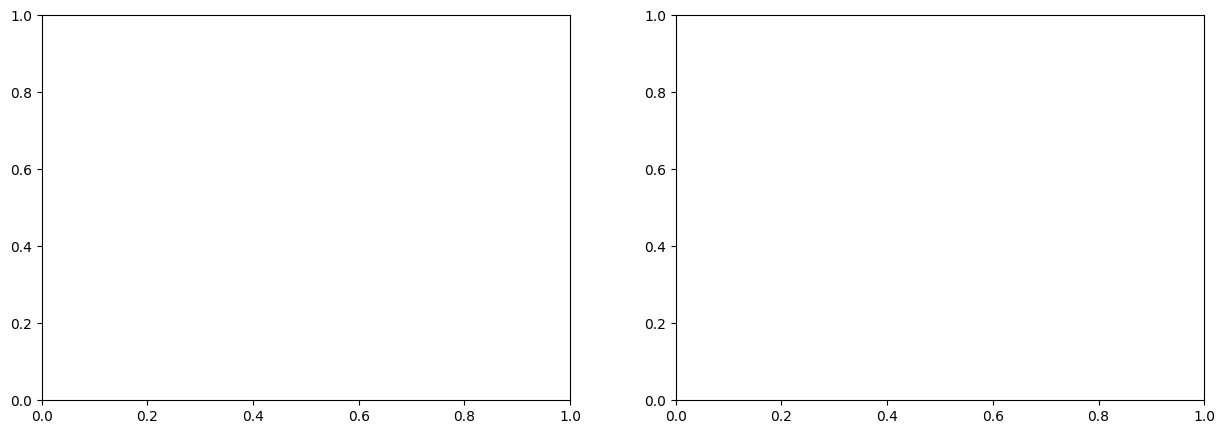

In [20]:
# fig, axs = plt.subplots(1,2,figsize=(15,5))

# axs[0].plot(history.history['accuracy'])
# axs[0].plot(history.history['val_accuracy'])
# axs[0].set_title('Model Accuracy')
# axs[0].set_ylabel('Accuracy')
# axs[0].set_xlabel('Epoch')
# axs[0].legend(['train', 'test'], loc='upper left')

# axs[1].plot(history.history['loss'])
# axs[1].plot(history.history['val_loss'])
# axs[1].set_title('Model Loss')
# axs[1].set_ylabel('Accuracy')
# axs[1].set_xlabel('Epoch')
# axs[1].legend(['train', 'test'], loc='upper left')

In [17]:
# model sanırım overfit oluyor en ideal modeli getirmek için callback ayarlamak gerek

In [21]:
finals = model.evaluate(x_test, y_test, verbose=1)
print('Test Loss:', finals[0])
print('Test Accuracy', finals[1])

314/314 [==============================] - 6s 18ms/step - loss: 0.2205 - accuracy: 0.9441
Test Loss: 0.2204597145318985
Test Accuracy 0.9441340565681458


In [22]:
def heatmap (data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    if not ax:
        ax = plt.gca()
    im = ax.imshow(data, **kwargs)
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    
    return im, cbar

In [23]:
def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    texts=[]
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j,i,format(data[i,j], fmt), horizontalalignment="center", color="white" if data[i,j] > thresh else "black")
            texts.append(text)
    return texts

314/314 [==============================] - 6s 18ms/step


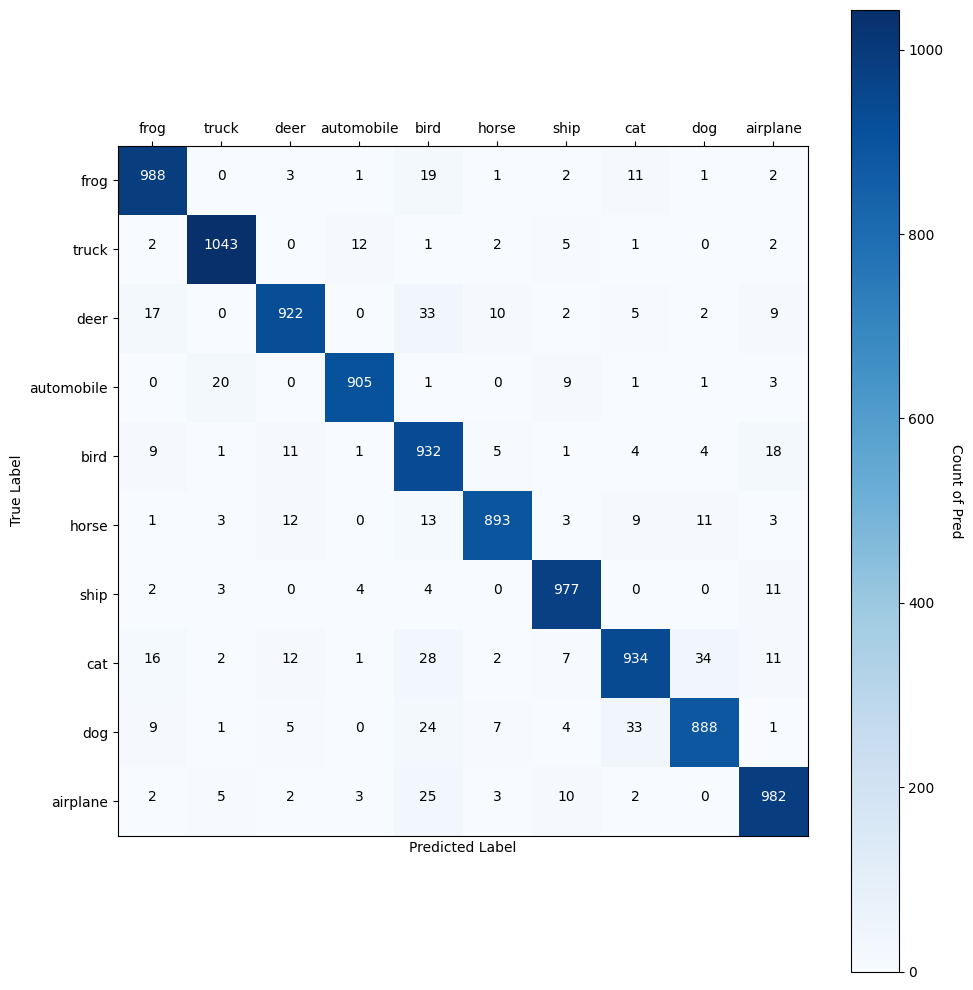

In [24]:
pred = model.predict(x_test)
y_pred_classes = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)
errors = (y_pred_classes - y_true != 0)

y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

cm = confusion_matrix(y_true, y_pred_classes)
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(10,10))
im, cbar = heatmap(cm, LABELS, LABELS, ax=ax, cmap=plt.cm.Blues, cbarlabel="Count of Pred")
texts = annotate_heatmap(im, data=cm, threshold = thresh)

fig.tight_layout()
plt.show()

In [25]:
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1028
           1       0.97      0.98      0.97      1068
           2       0.95      0.92      0.94      1000
           3       0.98      0.96      0.97       940
           4       0.86      0.95      0.90       986
           5       0.97      0.94      0.95       948
           6       0.96      0.98      0.97      1001
           7       0.93      0.89      0.91      1047
           8       0.94      0.91      0.93       972
           9       0.94      0.95      0.95      1034

    accuracy                           0.94     10024
   macro avg       0.95      0.94      0.94     10024
weighted avg       0.94      0.94      0.94     10024



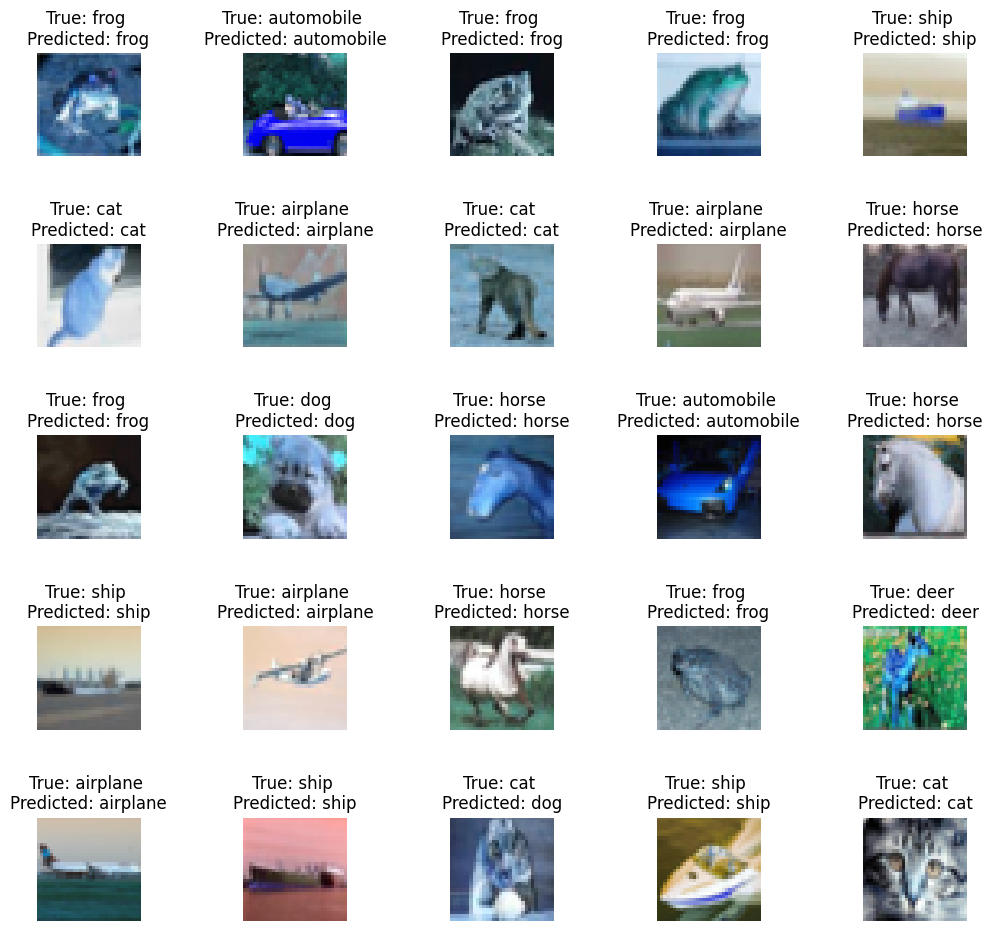

In [26]:
fig, axes = plt.subplots(5,5, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredicted: %s" % (LABELS[y_true[i]], LABELS[y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [24]:
save_directory = 'çıktılar'
if not os.path.exists(save_directory):
    os.mkdir(save_directory)
    
json_string = model.to_json()
open(os.path.join(save_directory,'hw3_cifar10_5katman.json'), 'w').write(json_string)
model.save_weights(os.path.join(save_directory,'hw3_cifar10._5katman_agirliklar.h5'))
model.save(os.path.join(save_directory,'hw3_cifar10._5katman.h5'))

# modelin mimarisini ve ağırlıkları 'çıktılar' directory'sine kaydediyoruz

In [25]:
# test_datagen = ImageDataGenerator(rescale=1./255)
# test_gen = test_datagen.flow_from_directory(test_path, target_size=(img_size,img_size), class_mode=None, shuffle=False)

# flow_from_directory methodu her zaman kendine bir subfolder arıyor class olarak yoksa fotoğrafları görmüyor
# o yüzden test klasörü içine bir tane daha test klasörü açıp içine attım hepsini yani test\test olacak

In [26]:
# predictions_vecs = model.predict(test_gen)

# predictions_final = np.argmax(predictions_vecs, axis=1)

In [27]:
# test_gen.filenames
# # dosyaları kontrol ettim

In [28]:
# classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
# # alfabetik olarak sınıflar

# predicted_classes=np.empty(shape=300000,dtype=np.dtype('U20'))

# ind=0
# for i in predictions_final.tolist():
#     predicted_classes[ind]=classes[i]
#     ind=ind+1
    
# filenames = []
# for i in test_gen.filenames:
#     filenames.append(int(i.split(sep="test\\")[1].split(sep=".")[0])-1)

# predicted_classes_final = np.empty(shape=300000,dtype=np.dtype('U20'))
# predicted_classes_final[filenames]=predicted_classes

In [29]:
# sub = pd.read_csv(r'C:\Users\Fatih\Desktop\a\sampleSubmission.csv',header='infer')
# sub.info()

# sub['label'] = predicted_classes_final
# sub.to_csv('submission.csv',index=False)

In [30]:
# def predict_prob(number):
#   return [number[0],1-number[0]]

# y_prob = np.array(list(map(predict_prob, model.predict(test_gen))))
# y_prob 

1/1 [==============================] - 0s 22ms/step
1. airplane <---------------> 0.9076985716819763
2. deer <---------------> 0.06609100103378296
3. bird <---------------> 0.025894014164805412
4. ship <---------------> 0.000150993000715971
5. automobile <---------------> 4.7891047870507464e-05
6. horse <---------------> 4.17389819631353e-05
7. truck <---------------> 3.7676538340747356e-05
8. frog <---------------> 3.177591133862734e-05
9. cat <---------------> 3.99287910113344e-06
10. dog <---------------> 2.3547768250864465e-06


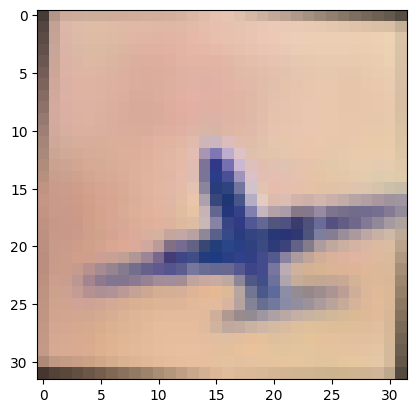

In [27]:
photo_test_getprob = cv2.imread(r'C:\Users\Fatih\Desktop\a\test\test\5.png')
photo_test_getprob = cv2.resize(photo_test_getprob, (32, 32), interpolation=cv2.INTER_AREA)

test_photo = []
test_photo.append(list(photo_test_getprob))
test_photo = np.array(test_photo, dtype=np.float32) / 255
test_predicts = model.predict(test_photo)
test_similarity = test_predicts[0]
test_similarity_sort = test_similarity[np.argsort(-test_similarity)]


plt.imshow(photo_test_getprob)
img = 0
for similarity in test_similarity_sort:
    print(f'{img+1}. {LABELS[np.where(test_similarity==test_similarity_sort[img])[0][0]]} <---------------> {similarity}')
    img=img+1

1/1 [==============================] - 0s 22ms/step
1. airplane <---------------> 0.9977966547012329
2. bird <---------------> 0.0010183844715356827
3. deer <---------------> 0.0005942240823060274
4. ship <---------------> 0.00039098001434467733
5. frog <---------------> 0.00018014511442743242
6. dog <---------------> 6.925545221747598e-06
7. horse <---------------> 6.481133823399432e-06
8. cat <---------------> 4.891451226285426e-06
9. truck <---------------> 7.124656349333236e-07
10. automobile <---------------> 6.36658455732686e-07


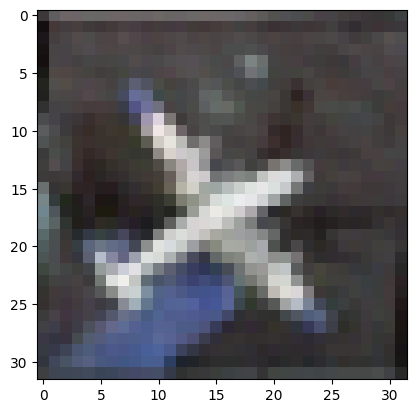

In [28]:
photo_test_getprob = cv2.imread(r'C:\Users\Fatih\Desktop\a\test\test\7.png')
photo_test_getprob = cv2.resize(photo_test_getprob, (32, 32), interpolation=cv2.INTER_AREA)

test_photo = []
test_photo.append(list(photo_test_getprob))
test_photo = np.array(test_photo, dtype=np.float32) / 255
test_predicts = model.predict(test_photo)
test_similarity = test_predicts[0]
test_similarity_sort = test_similarity[np.argsort(-test_similarity)]


plt.imshow(photo_test_getprob)
img = 0
for similarity in test_similarity_sort:
    print(f'{img+1}. {LABELS[np.where(test_similarity==test_similarity_sort[img])[0][0]]} <---------------> {similarity}')
    img=img+1

1/1 [==============================] - 0s 22ms/step
1. bird <---------------> 0.915541410446167
2. airplane <---------------> 0.08111061155796051
3. frog <---------------> 0.0016916142776608467
4. deer <---------------> 0.0010805907659232616
5. ship <---------------> 0.0002465047291480005
6. truck <---------------> 0.00011735486623365432
7. horse <---------------> 0.00010197309165960178
8. automobile <---------------> 8.165941835613921e-05
9. dog <---------------> 2.1084395484649576e-05
10. cat <---------------> 7.206380360003095e-06


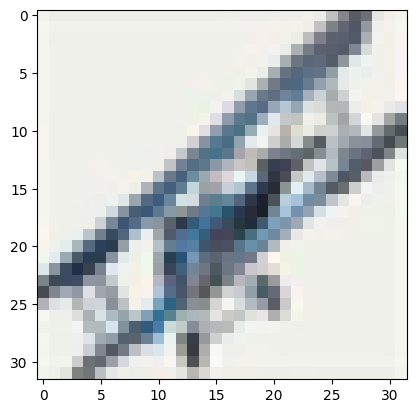

In [33]:
photo_test_getprob = cv2.imread(r'C:\Users\Fatih\Desktop\a\test\test\1166.png')
photo_test_getprob = cv2.resize(photo_test_getprob, (32, 32), interpolation=cv2.INTER_AREA)

test_photo = []
test_photo.append(list(photo_test_getprob))
test_photo = np.array(test_photo, dtype=np.float32) / 255
test_predicts = model.predict(test_photo)
test_similarity = test_predicts[0]
test_similarity_sort = test_similarity[np.argsort(-test_similarity)]


plt.imshow(photo_test_getprob)
img = 0
for similarity in test_similarity_sort:
    print(f'{img+1}. {LABELS[np.where(test_similarity==test_similarity_sort[img])[0][0]]} <---------------> {similarity}')
    img=img+1

1/1 [==============================] - 0s 30ms/step
1. automobile <---------------> 0.9999799728393555
2. truck <---------------> 1.9979923308710568e-05
3. bird <---------------> 8.402480489166919e-09
4. horse <---------------> 5.3457513971011394e-09
5. ship <---------------> 2.363514273184819e-09
6. dog <---------------> 1.6838390681783721e-09
7. cat <---------------> 1.5494125982229434e-09
8. frog <---------------> 1.1209408956602829e-09
9. airplane <---------------> 5.61279668576109e-11
10. deer <---------------> 2.0678200471357933e-11


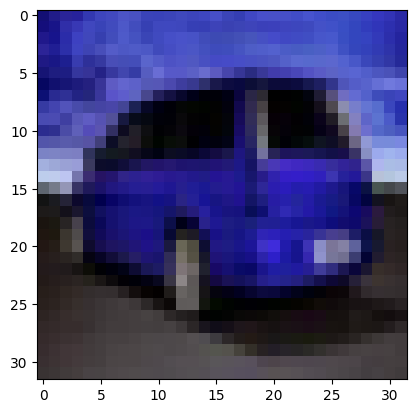

In [34]:
photo_test_getprob = cv2.imread(r'C:\Users\Fatih\Desktop\a\test\test\24.png')
photo_test_getprob = cv2.resize(photo_test_getprob, (32, 32), interpolation=cv2.INTER_AREA)

test_photo = []
test_photo.append(list(photo_test_getprob))
test_photo = np.array(test_photo, dtype=np.float32) / 255
test_predicts = model.predict(test_photo)
test_similarity = test_predicts[0]
test_similarity_sort = test_similarity[np.argsort(-test_similarity)]


plt.imshow(photo_test_getprob)
img = 0
for similarity in test_similarity_sort:
    print(f'{img+1}. {LABELS[np.where(test_similarity==test_similarity_sort[img])[0][0]]} <---------------> {similarity}')
    img=img+1

1/1 [==============================] - 0s 22ms/step
1. automobile <---------------> 0.9999994039535522
2. truck <---------------> 4.2276576550648315e-07
3. ship <---------------> 8.483747393484009e-08
4. dog <---------------> 3.722583841181404e-08
5. bird <---------------> 1.5682703136121745e-08
6. airplane <---------------> 6.983343237010331e-09
7. frog <---------------> 2.2569515145676178e-09
8. horse <---------------> 1.7234716986891385e-09
9. deer <---------------> 1.0978312703358029e-09
10. cat <---------------> 7.097276100154204e-10


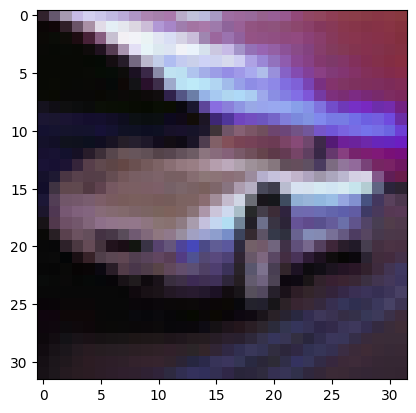

In [35]:
photo_test_getprob = cv2.imread(r'C:\Users\Fatih\Desktop\a\test\test\27.png')
photo_test_getprob = cv2.resize(photo_test_getprob, (32, 32), interpolation=cv2.INTER_AREA)

test_photo = []
test_photo.append(list(photo_test_getprob))
test_photo = np.array(test_photo, dtype=np.float32) / 255
test_predicts = model.predict(test_photo)
test_similarity = test_predicts[0]
test_similarity_sort = test_similarity[np.argsort(-test_similarity)]


plt.imshow(photo_test_getprob)
img = 0
for similarity in test_similarity_sort:
    print(f'{img+1}. {LABELS[np.where(test_similarity==test_similarity_sort[img])[0][0]]} <---------------> {similarity}')
    img=img+1

1/1 [==============================] - 0s 21ms/step
1. ship <---------------> 0.5419027209281921
2. truck <---------------> 0.30117106437683105
3. airplane <---------------> 0.14330370724201202
4. automobile <---------------> 0.00742759695276618
5. bird <---------------> 0.0033983730245381594
6. cat <---------------> 0.001042767078615725
7. deer <---------------> 0.0007932155858725309
8. frog <---------------> 0.000777293520513922
9. dog <---------------> 0.0001300451549468562
10. horse <---------------> 5.322120341588743e-05


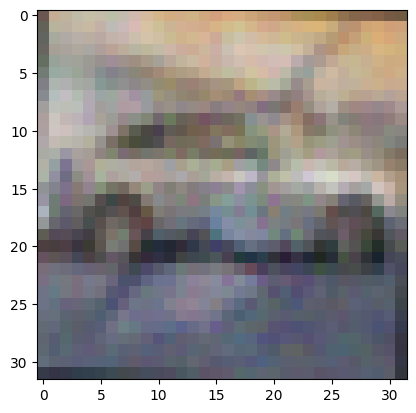

In [36]:
photo_test_getprob = cv2.imread(r'C:\Users\Fatih\Desktop\a\test\test\91.png')
photo_test_getprob = cv2.resize(photo_test_getprob, (32, 32), interpolation=cv2.INTER_AREA)

test_photo = []
test_photo.append(list(photo_test_getprob))
test_photo = np.array(test_photo, dtype=np.float32) / 255
test_predicts = model.predict(test_photo)
test_similarity = test_predicts[0]
test_similarity_sort = test_similarity[np.argsort(-test_similarity)]


plt.imshow(photo_test_getprob)
img = 0
for similarity in test_similarity_sort:
    print(f'{img+1}. {LABELS[np.where(test_similarity==test_similarity_sort[img])[0][0]]} <---------------> {similarity}')
    img=img+1

1/1 [==============================] - 0s 21ms/step
1. bird <---------------> 0.9984620809555054
2. frog <---------------> 0.0014892491744831204
3. airplane <---------------> 1.6882242562132888e-05
4. ship <---------------> 8.712523595022503e-06
5. cat <---------------> 7.402520168398041e-06
6. automobile <---------------> 5.2031305131095e-06
7. dog <---------------> 4.913903467240743e-06
8. deer <---------------> 3.2554150948271854e-06
9. truck <---------------> 2.206264298365568e-06
10. horse <---------------> 6.878443059576966e-08


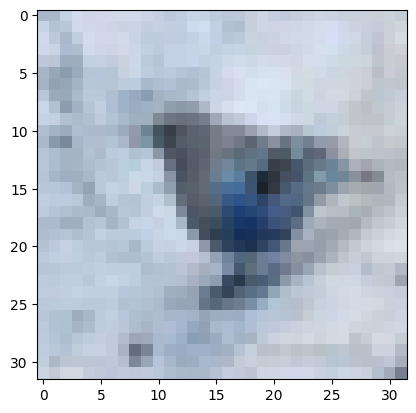

In [37]:
photo_test_getprob = cv2.imread(r'C:\Users\Fatih\Desktop\a\test\test\51.png')
photo_test_getprob = cv2.resize(photo_test_getprob, (32, 32), interpolation=cv2.INTER_AREA)

test_photo = []
test_photo.append(list(photo_test_getprob))
test_photo = np.array(test_photo, dtype=np.float32) / 255
test_predicts = model.predict(test_photo)
test_similarity = test_predicts[0]
test_similarity_sort = test_similarity[np.argsort(-test_similarity)]


plt.imshow(photo_test_getprob)
img = 0
for similarity in test_similarity_sort:
    print(f'{img+1}. {LABELS[np.where(test_similarity==test_similarity_sort[img])[0][0]]} <---------------> {similarity}')
    img=img+1

1/1 [==============================] - 0s 22ms/step
1. dog <---------------> 0.6772668361663818
2. frog <---------------> 0.31107720732688904
3. bird <---------------> 0.010556546039879322
4. cat <---------------> 0.0006574140279553831
5. horse <---------------> 0.00021941644081380218
6. deer <---------------> 0.0001956356572918594
7. ship <---------------> 1.465041350456886e-05
8. automobile <---------------> 8.349003110197373e-06
9. airplane <---------------> 3.0832829907012638e-06
10. truck <---------------> 8.906927746465954e-07


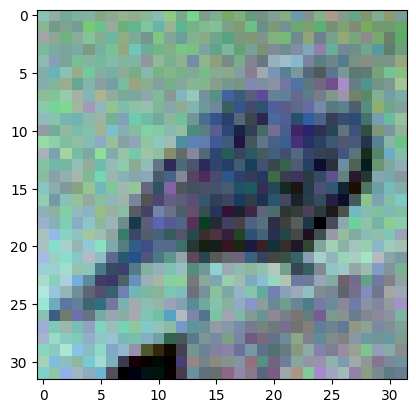

In [38]:
photo_test_getprob = cv2.imread(r'C:\Users\Fatih\Desktop\a\test\test\88.png')
photo_test_getprob = cv2.resize(photo_test_getprob, (32, 32), interpolation=cv2.INTER_AREA)

test_photo = []
test_photo.append(list(photo_test_getprob))
test_photo = np.array(test_photo, dtype=np.float32) / 255
test_predicts = model.predict(test_photo)
test_similarity = test_predicts[0]
test_similarity_sort = test_similarity[np.argsort(-test_similarity)]


plt.imshow(photo_test_getprob)
img = 0
for similarity in test_similarity_sort:
    print(f'{img+1}. {LABELS[np.where(test_similarity==test_similarity_sort[img])[0][0]]} <---------------> {similarity}')
    img=img+1

1/1 [==============================] - 0s 21ms/step
1. bird <---------------> 0.9997685551643372
2. frog <---------------> 7.192071643657982e-05
3. deer <---------------> 5.492728450917639e-05
4. ship <---------------> 4.731357694254257e-05
5. horse <---------------> 2.411467175988946e-05
6. automobile <---------------> 1.4880425624141935e-05
7. cat <---------------> 7.612560239067534e-06
8. truck <---------------> 7.274916242749896e-06
9. dog <---------------> 2.6331169920013053e-06
10. airplane <---------------> 8.097822501440533e-07


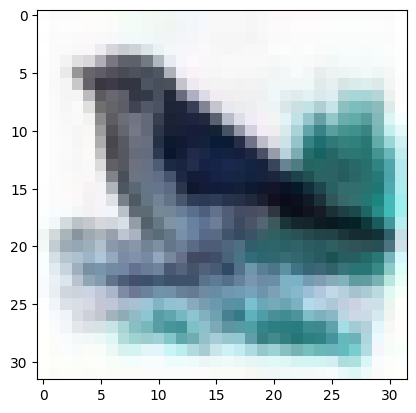

In [39]:
photo_test_getprob = cv2.imread(r'C:\Users\Fatih\Desktop\a\test\test\179.png')
photo_test_getprob = cv2.resize(photo_test_getprob, (32, 32), interpolation=cv2.INTER_AREA)

test_photo = []
test_photo.append(list(photo_test_getprob))
test_photo = np.array(test_photo, dtype=np.float32) / 255
test_predicts = model.predict(test_photo)
test_similarity = test_predicts[0]
test_similarity_sort = test_similarity[np.argsort(-test_similarity)]


plt.imshow(photo_test_getprob)
img = 0
for similarity in test_similarity_sort:
    print(f'{img+1}. {LABELS[np.where(test_similarity==test_similarity_sort[img])[0][0]]} <---------------> {similarity}')
    img=img+1

1/1 [==============================] - 0s 24ms/step
1. cat <---------------> 0.9915607571601868
2. dog <---------------> 0.008270543068647385
3. frog <---------------> 0.0001599776733200997
4. deer <---------------> 4.456474925973453e-06
5. bird <---------------> 2.241912625322584e-06
6. truck <---------------> 9.082763199330657e-07
7. horse <---------------> 8.56695578477229e-07
8. airplane <---------------> 1.380578424914347e-07
9. ship <---------------> 1.3659889930295321e-07
10. automobile <---------------> 3.007392024301225e-08


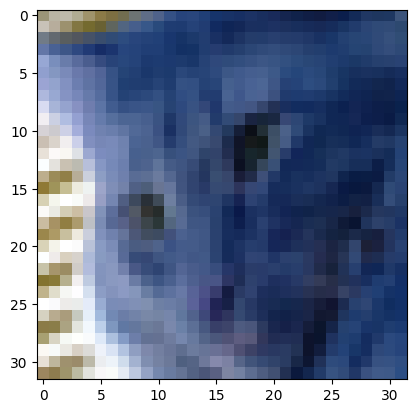

In [40]:
photo_test_getprob = cv2.imread(r'C:\Users\Fatih\Desktop\a\test\test\177.png')
photo_test_getprob = cv2.resize(photo_test_getprob, (32, 32), interpolation=cv2.INTER_AREA)

test_photo = []
test_photo.append(list(photo_test_getprob))
test_photo = np.array(test_photo, dtype=np.float32) / 255
test_predicts = model.predict(test_photo)
test_similarity = test_predicts[0]
test_similarity_sort = test_similarity[np.argsort(-test_similarity)]


plt.imshow(photo_test_getprob)
img = 0
for similarity in test_similarity_sort:
    print(f'{img+1}. {LABELS[np.where(test_similarity==test_similarity_sort[img])[0][0]]} <---------------> {similarity}')
    img=img+1

1/1 [==============================] - 0s 21ms/step
1. cat <---------------> 0.8972517251968384
2. horse <---------------> 0.07608748227357864
3. dog <---------------> 0.013616104610264301
4. truck <---------------> 0.008694164454936981
5. bird <---------------> 0.003375653875991702
6. deer <---------------> 0.0005403778632171452
7. frog <---------------> 0.00018726635607890785
8. automobile <---------------> 0.00017680802557151765
9. ship <---------------> 5.476494334288873e-05
10. airplane <---------------> 1.5664090824429877e-05


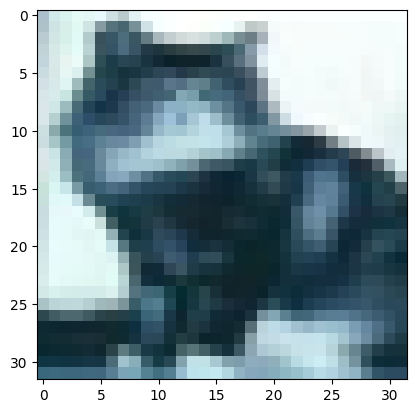

In [41]:
photo_test_getprob = cv2.imread(r'C:\Users\Fatih\Desktop\a\test\test\204.png')
photo_test_getprob = cv2.resize(photo_test_getprob, (32, 32), interpolation=cv2.INTER_AREA)

test_photo = []
test_photo.append(list(photo_test_getprob))
test_photo = np.array(test_photo, dtype=np.float32) / 255
test_predicts = model.predict(test_photo)
test_similarity = test_predicts[0]
test_similarity_sort = test_similarity[np.argsort(-test_similarity)]


plt.imshow(photo_test_getprob)
img = 0
for similarity in test_similarity_sort:
    print(f'{img+1}. {LABELS[np.where(test_similarity==test_similarity_sort[img])[0][0]]} <---------------> {similarity}')
    img=img+1

1/1 [==============================] - 0s 23ms/step
1. frog <---------------> 0.9536117911338806
2. cat <---------------> 0.025260256603360176
3. bird <---------------> 0.02042854018509388
4. deer <---------------> 0.0003800220729317516
5. ship <---------------> 0.00019357333076186478
6. dog <---------------> 7.979312067618594e-05
7. truck <---------------> 2.400796438450925e-05
8. airplane <---------------> 1.1177674423379358e-05
9. automobile <---------------> 9.43531995289959e-06
10. horse <---------------> 1.4516053852275945e-06


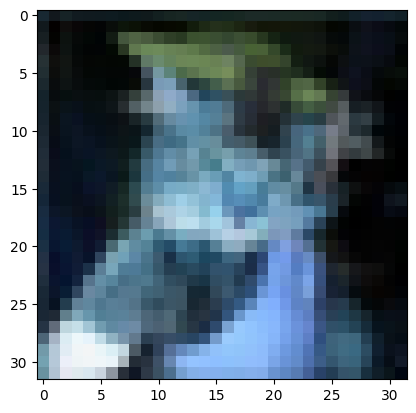

In [42]:
photo_test_getprob = cv2.imread(r'C:\Users\Fatih\Desktop\a\test\test\316.png')
photo_test_getprob = cv2.resize(photo_test_getprob, (32, 32), interpolation=cv2.INTER_AREA)

test_photo = []
test_photo.append(list(photo_test_getprob))
test_photo = np.array(test_photo, dtype=np.float32) / 255
test_predicts = model.predict(test_photo)
test_similarity = test_predicts[0]
test_similarity_sort = test_similarity[np.argsort(-test_similarity)]


plt.imshow(photo_test_getprob)
img = 0
for similarity in test_similarity_sort:
    print(f'{img+1}. {LABELS[np.where(test_similarity==test_similarity_sort[img])[0][0]]} <---------------> {similarity}')
    img=img+1

1/1 [==============================] - 0s 36ms/step
1. deer <---------------> 0.9999926090240479
2. bird <---------------> 6.890912572998786e-06
3. airplane <---------------> 3.3583353342692135e-07
4. horse <---------------> 1.1454646653419331e-07
5. dog <---------------> 4.9176776428794255e-08
6. frog <---------------> 3.0614447865673355e-08
7. cat <---------------> 2.5372280276769743e-08
8. ship <---------------> 1.3936341858311607e-08
9. automobile <---------------> 2.05223771310159e-09
10. truck <---------------> 7.392305101383556e-10


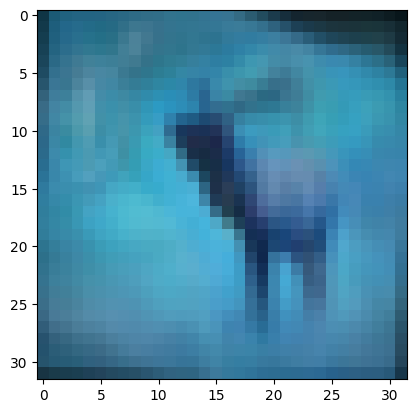

In [43]:
photo_test_getprob = cv2.imread(r'C:\Users\Fatih\Desktop\a\test\test\44.png')
photo_test_getprob = cv2.resize(photo_test_getprob, (32, 32), interpolation=cv2.INTER_AREA)

test_photo = []
test_photo.append(list(photo_test_getprob))
test_photo = np.array(test_photo, dtype=np.float32) / 255
test_predicts = model.predict(test_photo)
test_similarity = test_predicts[0]
test_similarity_sort = test_similarity[np.argsort(-test_similarity)]


plt.imshow(photo_test_getprob)
img = 0
for similarity in test_similarity_sort:
    print(f'{img+1}. {LABELS[np.where(test_similarity==test_similarity_sort[img])[0][0]]} <---------------> {similarity}')
    img=img+1

1/1 [==============================] - 0s 22ms/step
1. deer <---------------> 0.9749290943145752
2. bird <---------------> 0.011442434974014759
3. horse <---------------> 0.0059880162589251995
4. airplane <---------------> 0.004868642892688513
5. cat <---------------> 0.0013284031301736832
6. dog <---------------> 0.0010926047107204795
7. truck <---------------> 0.00018483090389054269
8. ship <---------------> 8.35833270684816e-05
9. frog <---------------> 5.6292610679520294e-05
10. automobile <---------------> 2.596365266072098e-05


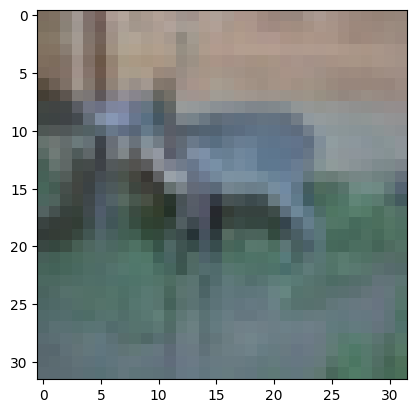

In [44]:
photo_test_getprob = cv2.imread(r'C:\Users\Fatih\Desktop\a\test\test\403.png')
photo_test_getprob = cv2.resize(photo_test_getprob, (32, 32), interpolation=cv2.INTER_AREA)

test_photo = []
test_photo.append(list(photo_test_getprob))
test_photo = np.array(test_photo, dtype=np.float32) / 255
test_predicts = model.predict(test_photo)
test_similarity = test_predicts[0]
test_similarity_sort = test_similarity[np.argsort(-test_similarity)]


plt.imshow(photo_test_getprob)
img = 0
for similarity in test_similarity_sort:
    print(f'{img+1}. {LABELS[np.where(test_similarity==test_similarity_sort[img])[0][0]]} <---------------> {similarity}')
    img=img+1

1/1 [==============================] - 0s 22ms/step
1. deer <---------------> 0.9982197880744934
2. dog <---------------> 0.0010020047193393111
3. cat <---------------> 0.0006981455371715128
4. frog <---------------> 3.480311352177523e-05
5. horse <---------------> 2.510738886485342e-05
6. bird <---------------> 6.085776931286091e-06
7. airplane <---------------> 5.2882519412378315e-06
8. ship <---------------> 3.991108314949088e-06
9. automobile <---------------> 3.5335187931195833e-06
10. truck <---------------> 1.1340214314259356e-06


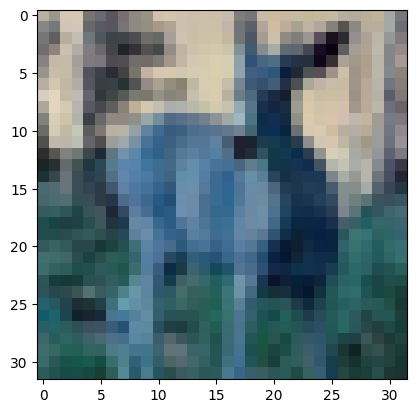

In [45]:
photo_test_getprob = cv2.imread(r'C:\Users\Fatih\Desktop\a\test\test\587.png')
photo_test_getprob = cv2.resize(photo_test_getprob, (32, 32), interpolation=cv2.INTER_AREA)

test_photo = []
test_photo.append(list(photo_test_getprob))
test_photo = np.array(test_photo, dtype=np.float32) / 255
test_predicts = model.predict(test_photo)
test_similarity = test_predicts[0]
test_similarity_sort = test_similarity[np.argsort(-test_similarity)]


plt.imshow(photo_test_getprob)
img = 0
for similarity in test_similarity_sort:
    print(f'{img+1}. {LABELS[np.where(test_similarity==test_similarity_sort[img])[0][0]]} <---------------> {similarity}')
    img=img+1

1/1 [==============================] - 0s 23ms/step
1. dog <---------------> 0.5060664415359497
2. bird <---------------> 0.3379247188568115
3. cat <---------------> 0.14773717522621155
4. frog <---------------> 0.005751730874180794
5. deer <---------------> 0.0019446138758212328
6. horse <---------------> 0.0002973414084408432
7. ship <---------------> 0.00019123924721498042
8. automobile <---------------> 4.411334157339297e-05
9. truck <---------------> 3.5001678043045104e-05
10. airplane <---------------> 7.609772183059249e-06


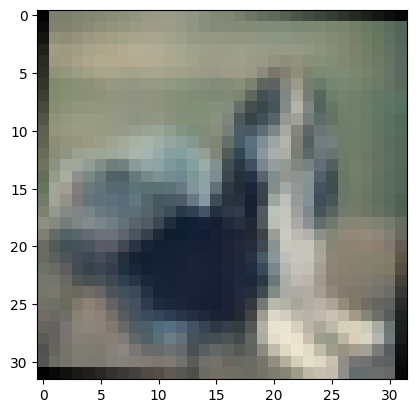

In [46]:
photo_test_getprob = cv2.imread(r'C:\Users\Fatih\Desktop\a\test\test\420.png')
photo_test_getprob = cv2.resize(photo_test_getprob, (32, 32), interpolation=cv2.INTER_AREA)

test_photo = []
test_photo.append(list(photo_test_getprob))
test_photo = np.array(test_photo, dtype=np.float32) / 255
test_predicts = model.predict(test_photo)
test_similarity = test_predicts[0]
test_similarity_sort = test_similarity[np.argsort(-test_similarity)]


plt.imshow(photo_test_getprob)
img = 0
for similarity in test_similarity_sort:
    print(f'{img+1}. {LABELS[np.where(test_similarity==test_similarity_sort[img])[0][0]]} <---------------> {similarity}')
    img=img+1

1/1 [==============================] - 0s 23ms/step
1. dog <---------------> 0.9907676577568054
2. cat <---------------> 0.009219222702085972
3. horse <---------------> 6.552062586706597e-06
4. bird <---------------> 4.40756002717535e-06
5. deer <---------------> 1.958622078745975e-06
6. ship <---------------> 6.005381436580137e-08
7. frog <---------------> 5.178403839067869e-08
8. automobile <---------------> 3.210539745168717e-08
9. airplane <---------------> 1.7242467009737084e-08
10. truck <---------------> 1.3375200502707685e-08


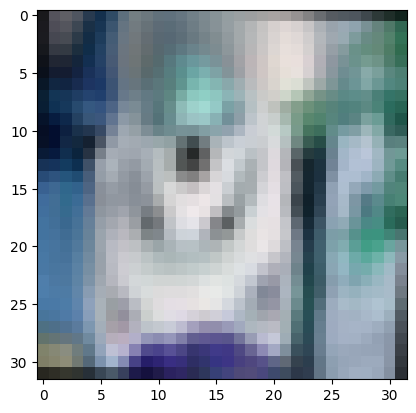

In [47]:
photo_test_getprob = cv2.imread(r'C:\Users\Fatih\Desktop\a\test\test\557.png')
photo_test_getprob = cv2.resize(photo_test_getprob, (32, 32), interpolation=cv2.INTER_AREA)

test_photo = []
test_photo.append(list(photo_test_getprob))
test_photo = np.array(test_photo, dtype=np.float32) / 255
test_predicts = model.predict(test_photo)
test_similarity = test_predicts[0]
test_similarity_sort = test_similarity[np.argsort(-test_similarity)]


plt.imshow(photo_test_getprob)
img = 0
for similarity in test_similarity_sort:
    print(f'{img+1}. {LABELS[np.where(test_similarity==test_similarity_sort[img])[0][0]]} <---------------> {similarity}')
    img=img+1

1/1 [==============================] - 0s 20ms/step
1. dog <---------------> 0.9964413046836853
2. cat <---------------> 0.0017431366723030806
3. horse <---------------> 0.0011382130905985832
4. deer <---------------> 0.0003837765543721616
5. bird <---------------> 0.00017480584210716188
6. frog <---------------> 6.676825432805344e-05
7. airplane <---------------> 2.8386035410221666e-05
8. truck <---------------> 9.20431011763867e-06
9. ship <---------------> 8.343513400177471e-06
10. automobile <---------------> 6.017642135702772e-06


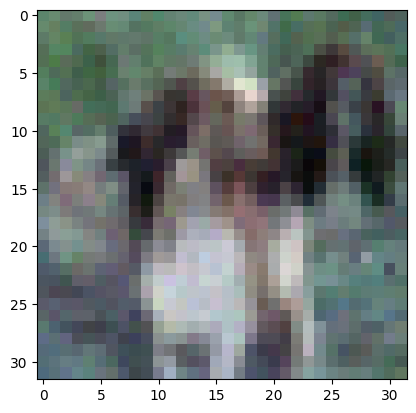

In [48]:
photo_test_getprob = cv2.imread(r'C:\Users\Fatih\Desktop\a\test\test\724.png')
photo_test_getprob = cv2.resize(photo_test_getprob, (32, 32), interpolation=cv2.INTER_AREA)

test_photo = []
test_photo.append(list(photo_test_getprob))
test_photo = np.array(test_photo, dtype=np.float32) / 255
test_predicts = model.predict(test_photo)
test_similarity = test_predicts[0]
test_similarity_sort = test_similarity[np.argsort(-test_similarity)]


plt.imshow(photo_test_getprob)
img = 0
for similarity in test_similarity_sort:
    print(f'{img+1}. {LABELS[np.where(test_similarity==test_similarity_sort[img])[0][0]]} <---------------> {similarity}')
    img=img+1

1/1 [==============================] - 0s 23ms/step
1. frog <---------------> 0.999993085861206
2. bird <---------------> 5.391391823650338e-06
3. deer <---------------> 9.368333167003584e-07
4. cat <---------------> 4.6183782842490473e-07
5. ship <---------------> 8.509396565159477e-08
6. airplane <---------------> 2.0443009063342288e-08
7. horse <---------------> 8.497795356277038e-09
8. truck <---------------> 6.571962085644145e-09
9. automobile <---------------> 4.609204129479849e-09
10. dog <---------------> 1.5666509201039958e-09


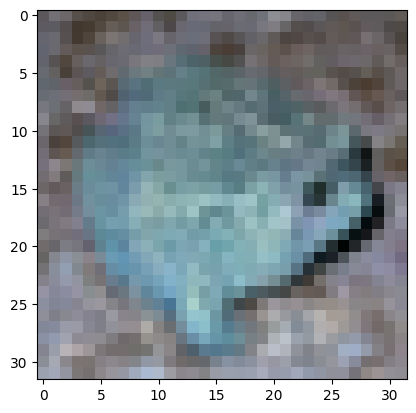

In [49]:
photo_test_getprob = cv2.imread(r'C:\Users\Fatih\Desktop\a\test\test\165.png')
photo_test_getprob = cv2.resize(photo_test_getprob, (32, 32), interpolation=cv2.INTER_AREA)

test_photo = []
test_photo.append(list(photo_test_getprob))
test_photo = np.array(test_photo, dtype=np.float32) / 255
test_predicts = model.predict(test_photo)
test_similarity = test_predicts[0]
test_similarity_sort = test_similarity[np.argsort(-test_similarity)]


plt.imshow(photo_test_getprob)
img = 0
for similarity in test_similarity_sort:
    print(f'{img+1}. {LABELS[np.where(test_similarity==test_similarity_sort[img])[0][0]]} <---------------> {similarity}')
    img=img+1

1/1 [==============================] - 0s 23ms/step
1. bird <---------------> 0.36728188395500183
2. deer <---------------> 0.3248750567436218
3. frog <---------------> 0.2568531036376953
4. airplane <---------------> 0.04281775280833244
5. ship <---------------> 0.003962182905524969
6. automobile <---------------> 0.002644109074026346
7. cat <---------------> 0.0013144598342478275
8. dog <---------------> 0.00011212220852030441
9. truck <---------------> 0.00010997747449437156
10. horse <---------------> 2.9311569960555062e-05


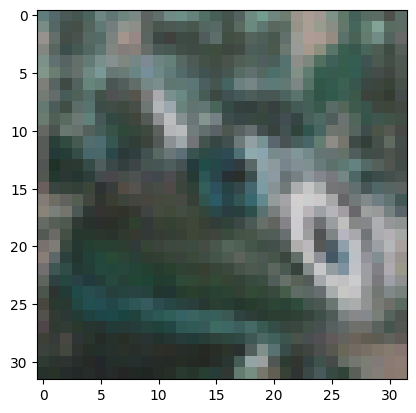

In [50]:
photo_test_getprob = cv2.imread(r'C:\Users\Fatih\Desktop\a\test\test\171.png')
photo_test_getprob = cv2.resize(photo_test_getprob, (32, 32), interpolation=cv2.INTER_AREA)

test_photo = []
test_photo.append(list(photo_test_getprob))
test_photo = np.array(test_photo, dtype=np.float32) / 255
test_predicts = model.predict(test_photo)
test_similarity = test_predicts[0]
test_similarity_sort = test_similarity[np.argsort(-test_similarity)]


plt.imshow(photo_test_getprob)
img = 0
for similarity in test_similarity_sort:
    print(f'{img+1}. {LABELS[np.where(test_similarity==test_similarity_sort[img])[0][0]]} <---------------> {similarity}')
    img=img+1

1/1 [==============================] - 0s 30ms/step
1. frog <---------------> 0.9999997615814209
2. deer <---------------> 1.2821777772842324e-07
3. bird <---------------> 6.799679397317959e-08
4. cat <---------------> 1.1266352295535853e-08
5. truck <---------------> 8.171322285477345e-09
6. horse <---------------> 5.744452913347686e-09
7. automobile <---------------> 9.95469817688388e-10
8. dog <---------------> 6.522886675242034e-10
9. ship <---------------> 2.6056348745306934e-10
10. airplane <---------------> 2.47118520091405e-10


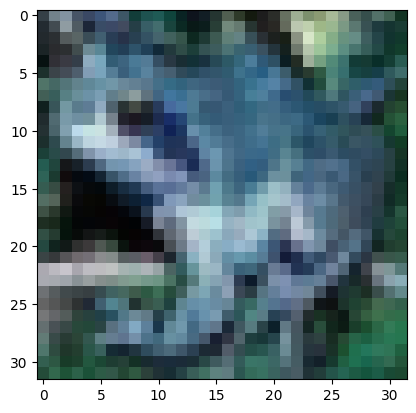

In [51]:
photo_test_getprob = cv2.imread(r'C:\Users\Fatih\Desktop\a\test\test\174.png')
photo_test_getprob = cv2.resize(photo_test_getprob, (32, 32), interpolation=cv2.INTER_AREA)

test_photo = []
test_photo.append(list(photo_test_getprob))
test_photo = np.array(test_photo, dtype=np.float32) / 255
test_predicts = model.predict(test_photo)
test_similarity = test_predicts[0]
test_similarity_sort = test_similarity[np.argsort(-test_similarity)]


plt.imshow(photo_test_getprob)
img = 0
for similarity in test_similarity_sort:
    print(f'{img+1}. {LABELS[np.where(test_similarity==test_similarity_sort[img])[0][0]]} <---------------> {similarity}')
    img=img+1

1/1 [==============================] - 0s 21ms/step
1. horse <---------------> 0.999993085861206
2. bird <---------------> 2.7025159852200886e-06
3. dog <---------------> 2.353669515287038e-06
4. deer <---------------> 1.5260043255693745e-06
5. airplane <---------------> 1.7818921094203688e-07
6. cat <---------------> 7.86024472176905e-08
7. truck <---------------> 1.3615902183516937e-08
8. ship <---------------> 1.166544016939497e-08
9. automobile <---------------> 6.644638173014528e-09
10. frog <---------------> 5.54386669904261e-09


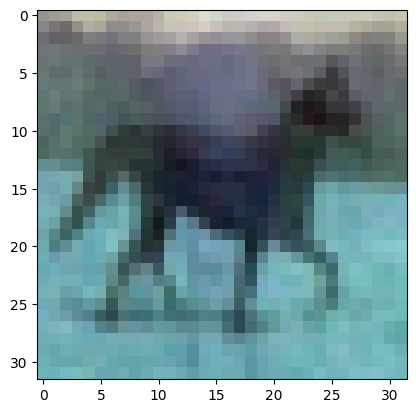

In [52]:
photo_test_getprob = cv2.imread(r'C:\Users\Fatih\Desktop\a\test\test\32.png')
photo_test_getprob = cv2.resize(photo_test_getprob, (32, 32), interpolation=cv2.INTER_AREA)

test_photo = []
test_photo.append(list(photo_test_getprob))
test_photo = np.array(test_photo, dtype=np.float32) / 255
test_predicts = model.predict(test_photo)
test_similarity = test_predicts[0]
test_similarity_sort = test_similarity[np.argsort(-test_similarity)]


plt.imshow(photo_test_getprob)
img = 0
for similarity in test_similarity_sort:
    print(f'{img+1}. {LABELS[np.where(test_similarity==test_similarity_sort[img])[0][0]]} <---------------> {similarity}')
    img=img+1

1/1 [==============================] - 0s 21ms/step
1. horse <---------------> 0.5627070069313049
2. cat <---------------> 0.34900981187820435
3. dog <---------------> 0.045745160430669785
4. truck <---------------> 0.014910649508237839
5. deer <---------------> 0.01073144655674696
6. bird <---------------> 0.008985752239823341
7. ship <---------------> 0.004434624686837196
8. automobile <---------------> 0.0015018009580671787
9. frog <---------------> 0.0014952741330489516
10. airplane <---------------> 0.0004783973563462496


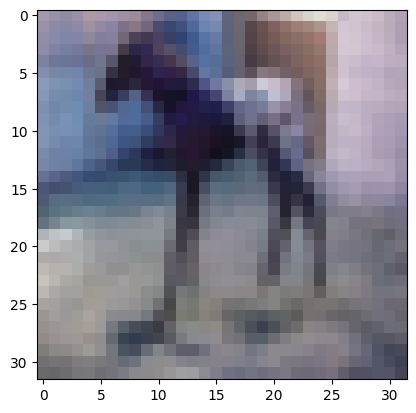

In [53]:
photo_test_getprob = cv2.imread(r'C:\Users\Fatih\Desktop\a\test\test\52.png')
photo_test_getprob = cv2.resize(photo_test_getprob, (32, 32), interpolation=cv2.INTER_AREA)

test_photo = []
test_photo.append(list(photo_test_getprob))
test_photo = np.array(test_photo, dtype=np.float32) / 255
test_predicts = model.predict(test_photo)
test_similarity = test_predicts[0]
test_similarity_sort = test_similarity[np.argsort(-test_similarity)]


plt.imshow(photo_test_getprob)
img = 0
for similarity in test_similarity_sort:
    print(f'{img+1}. {LABELS[np.where(test_similarity==test_similarity_sort[img])[0][0]]} <---------------> {similarity}')
    img=img+1

1/1 [==============================] - 0s 22ms/step
1. deer <---------------> 0.9624949097633362
2. horse <---------------> 0.03727750480175018
3. dog <---------------> 0.00010729012137744576
4. bird <---------------> 8.01572750788182e-05
5. cat <---------------> 3.858144555124454e-05
6. airplane <---------------> 9.402263572155789e-07
7. ship <---------------> 3.345728316617169e-07
8. truck <---------------> 1.1777654407296723e-07
9. automobile <---------------> 1.1150975609552916e-07
10. frog <---------------> 9.59624557594907e-08


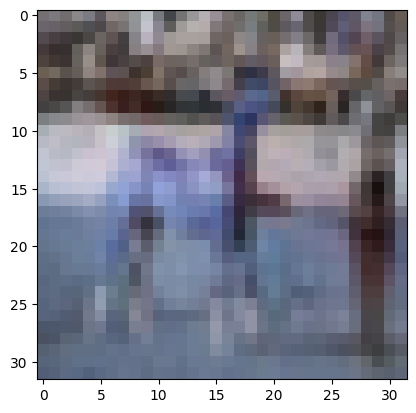

In [54]:
photo_test_getprob = cv2.imread(r'C:\Users\Fatih\Desktop\a\test\test\94.png')
photo_test_getprob = cv2.resize(photo_test_getprob, (32, 32), interpolation=cv2.INTER_AREA)

test_photo = []
test_photo.append(list(photo_test_getprob))
test_photo = np.array(test_photo, dtype=np.float32) / 255
test_predicts = model.predict(test_photo)
test_similarity = test_predicts[0]
test_similarity_sort = test_similarity[np.argsort(-test_similarity)]


plt.imshow(photo_test_getprob)
img = 0
for similarity in test_similarity_sort:
    print(f'{img+1}. {LABELS[np.where(test_similarity==test_similarity_sort[img])[0][0]]} <---------------> {similarity}')
    img=img+1

1/1 [==============================] - 0s 21ms/step
1. ship <---------------> 0.9999796152114868
2. airplane <---------------> 1.8903565432992764e-05
3. truck <---------------> 8.113393619169074e-07
4. bird <---------------> 3.7793986962242343e-07
5. frog <---------------> 5.998526120265524e-08
6. deer <---------------> 5.8861516549768567e-08
7. cat <---------------> 5.770982269837077e-08
8. horse <---------------> 1.703811491893248e-08
9. dog <---------------> 1.0500261993229287e-08
10. automobile <---------------> 8.515999461167212e-09


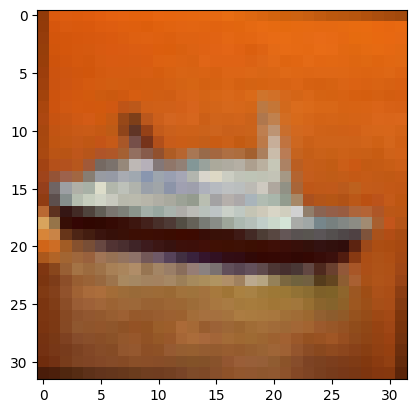

In [55]:
photo_test_getprob = cv2.imread(r'C:\Users\Fatih\Desktop\a\test\test\55.png')
photo_test_getprob = cv2.resize(photo_test_getprob, (32, 32), interpolation=cv2.INTER_AREA)

test_photo = []
test_photo.append(list(photo_test_getprob))
test_photo = np.array(test_photo, dtype=np.float32) / 255
test_predicts = model.predict(test_photo)
test_similarity = test_predicts[0]
test_similarity_sort = test_similarity[np.argsort(-test_similarity)]


plt.imshow(photo_test_getprob)
img = 0
for similarity in test_similarity_sort:
    print(f'{img+1}. {LABELS[np.where(test_similarity==test_similarity_sort[img])[0][0]]} <---------------> {similarity}')
    img=img+1

1/1 [==============================] - 0s 21ms/step
1. ship <---------------> 0.9998997449874878
2. truck <---------------> 8.404716209042817e-05
3. cat <---------------> 4.369748694443842e-06
4. airplane <---------------> 3.664022869998007e-06
5. automobile <---------------> 3.5063626455666963e-06
6. bird <---------------> 2.480838702467736e-06
7. dog <---------------> 9.758281294125482e-07
8. frog <---------------> 7.863607720537402e-07
9. deer <---------------> 2.2190013737599656e-07
10. horse <---------------> 1.762614800782103e-07


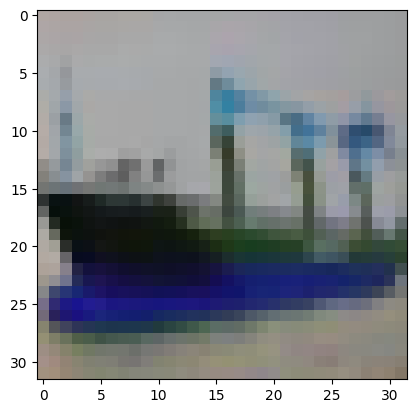

In [56]:
photo_test_getprob = cv2.imread(r'C:\Users\Fatih\Desktop\a\test\test\56.png')
photo_test_getprob = cv2.resize(photo_test_getprob, (32, 32), interpolation=cv2.INTER_AREA)

test_photo = []
test_photo.append(list(photo_test_getprob))
test_photo = np.array(test_photo, dtype=np.float32) / 255
test_predicts = model.predict(test_photo)
test_similarity = test_predicts[0]
test_similarity_sort = test_similarity[np.argsort(-test_similarity)]


plt.imshow(photo_test_getprob)
img = 0
for similarity in test_similarity_sort:
    print(f'{img+1}. {LABELS[np.where(test_similarity==test_similarity_sort[img])[0][0]]} <---------------> {similarity}')
    img=img+1

1/1 [==============================] - 0s 20ms/step
1. ship <---------------> 0.9983137845993042
2. airplane <---------------> 0.0016527896514162421
3. truck <---------------> 2.5640110834501684e-05
4. bird <---------------> 4.77140338261961e-06
5. automobile <---------------> 1.2052186093569617e-06
6. deer <---------------> 8.448895414403523e-07
7. horse <---------------> 7.063512157401419e-07
8. frog <---------------> 2.780697911930474e-07
9. cat <---------------> 9.802081279985941e-08
10. dog <---------------> 5.2217075108274e-08


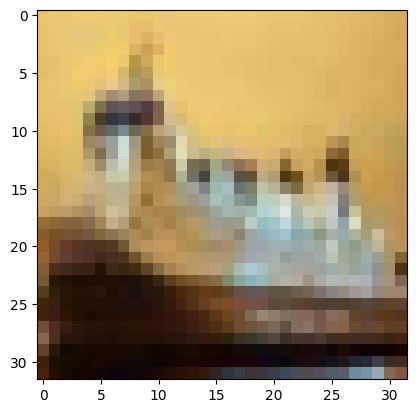

In [57]:
photo_test_getprob = cv2.imread(r'C:\Users\Fatih\Desktop\a\test\test\65.png')
photo_test_getprob = cv2.resize(photo_test_getprob, (32, 32), interpolation=cv2.INTER_AREA)

test_photo = []
test_photo.append(list(photo_test_getprob))
test_photo = np.array(test_photo, dtype=np.float32) / 255
test_predicts = model.predict(test_photo)
test_similarity = test_predicts[0]
test_similarity_sort = test_similarity[np.argsort(-test_similarity)]


plt.imshow(photo_test_getprob)
img = 0
for similarity in test_similarity_sort:
    print(f'{img+1}. {LABELS[np.where(test_similarity==test_similarity_sort[img])[0][0]]} <---------------> {similarity}')
    img=img+1

1/1 [==============================] - 0s 32ms/step
1. truck <---------------> 0.9999337196350098
2. horse <---------------> 6.263669638428837e-05
3. automobile <---------------> 3.5091779864160344e-06
4. cat <---------------> 2.45525427544635e-07
5. bird <---------------> 4.031292633044359e-08
6. deer <---------------> 1.8083494701670588e-09
7. frog <---------------> 1.7249961459242513e-09
8. ship <---------------> 1.473931643403148e-09
9. dog <---------------> 1.0833982599933734e-09
10. airplane <---------------> 3.4915453861472656e-10


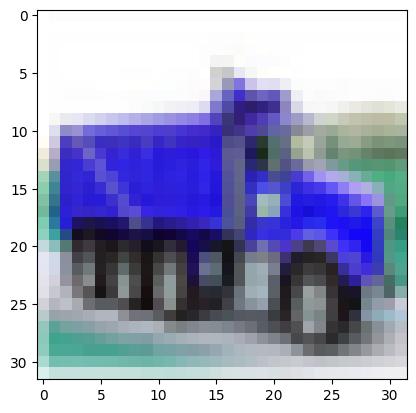

In [58]:
photo_test_getprob = cv2.imread(r'C:\Users\Fatih\Desktop\a\test\test\99.png')
photo_test_getprob = cv2.resize(photo_test_getprob, (32, 32), interpolation=cv2.INTER_AREA)

test_photo = []
test_photo.append(list(photo_test_getprob))
test_photo = np.array(test_photo, dtype=np.float32) / 255
test_predicts = model.predict(test_photo)
test_similarity = test_predicts[0]
test_similarity_sort = test_similarity[np.argsort(-test_similarity)]


plt.imshow(photo_test_getprob)
img = 0
for similarity in test_similarity_sort:
    print(f'{img+1}. {LABELS[np.where(test_similarity==test_similarity_sort[img])[0][0]]} <---------------> {similarity}')
    img=img+1

1/1 [==============================] - 0s 22ms/step
1. truck <---------------> 0.9999979734420776
2. automobile <---------------> 1.995460252146586e-06
3. ship <---------------> 6.475435188058043e-10
4. deer <---------------> 6.081357084575245e-10
5. horse <---------------> 5.100914690636671e-10
6. frog <---------------> 1.6880070952129955e-10
7. airplane <---------------> 1.2315874708956898e-10
8. cat <---------------> 9.552287433267637e-11
9. bird <---------------> 3.825138816804241e-11
10. dog <---------------> 2.490185835313241e-11


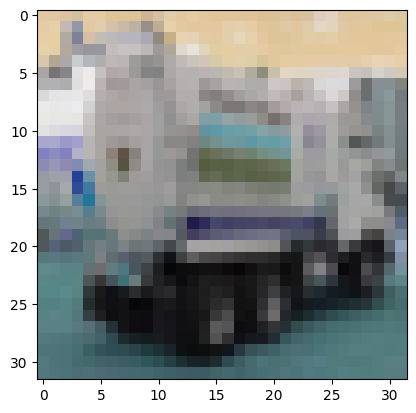

In [59]:
photo_test_getprob = cv2.imread(r'C:\Users\Fatih\Desktop\a\test\test\288.png')
photo_test_getprob = cv2.resize(photo_test_getprob, (32, 32), interpolation=cv2.INTER_AREA)

test_photo = []
test_photo.append(list(photo_test_getprob))
test_photo = np.array(test_photo, dtype=np.float32) / 255
test_predicts = model.predict(test_photo)
test_similarity = test_predicts[0]
test_similarity_sort = test_similarity[np.argsort(-test_similarity)]


plt.imshow(photo_test_getprob)
img = 0
for similarity in test_similarity_sort:
    print(f'{img+1}. {LABELS[np.where(test_similarity==test_similarity_sort[img])[0][0]]} <---------------> {similarity}')
    img=img+1

1/1 [==============================] - 0s 22ms/step
1. truck <---------------> 0.9999995231628418
2. automobile <---------------> 4.6721041258024343e-07
3. airplane <---------------> 4.300371259091662e-08
4. ship <---------------> 4.196884972884618e-08
5. dog <---------------> 1.0485554646777473e-09
6. horse <---------------> 6.437049226981628e-10
7. cat <---------------> 4.4212297711787585e-10
8. bird <---------------> 1.8953300040536192e-10
9. frog <---------------> 1.0939053829428502e-10
10. deer <---------------> 9.27570780601128e-12


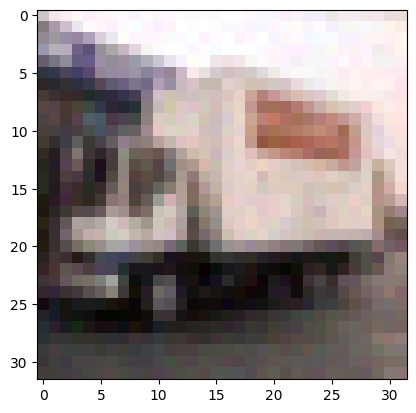

In [60]:
photo_test_getprob = cv2.imread(r'C:\Users\Fatih\Desktop\a\test\test\300.png')
photo_test_getprob = cv2.resize(photo_test_getprob, (32, 32), interpolation=cv2.INTER_AREA)

test_photo = []
test_photo.append(list(photo_test_getprob))
test_photo = np.array(test_photo, dtype=np.float32) / 255
test_predicts = model.predict(test_photo)
test_similarity = test_predicts[0]
test_similarity_sort = test_similarity[np.argsort(-test_similarity)]


plt.imshow(photo_test_getprob)
img = 0
for similarity in test_similarity_sort:
    print(f'{img+1}. {LABELS[np.where(test_similarity==test_similarity_sort[img])[0][0]]} <---------------> {similarity}')
    img=img+1

In [59]:
elleTest = []
testLabels = ['airplane', 'frog', 'frog', 'frog', 'cat', 'bird', 'cat', 'automobile', 'automobile', 'truck', 'truck', 'cat', 'horse', 'deer', 'dog', 'deer', 'airplane', 'bird', 'horse', 'ship', 'dog', 'ship', 'deer', 'ship', 'airplane', 'dog', 'bird', 'automobile', 'deer', 'truck']
for i in range(len(testLabels)):
    testLabels[i] = np.where(classes==testLabels[i])[0][0]

elleTestHepsi = glob(r'C:\Users\Fatih\Desktop\a\elleTestHepsi\*.png')
for x in elleTestHepsi: 
    img = cv2.imread(x)
    img = cv2.resize(img, (img_size, img_size), interpolation=cv2.INTER_AREA)
    elleTest.append(list(img))
    
elleTest = np.array(elleTest, dtype=np.float32) / 255
testLabels = np.array(testLabels)

testLabels = keras.utils.to_categorical(testLabels, 30)
if not testLabels.any():
    print("Error: testLabels array is empty")
    exit()

In [60]:
elleTestHepsi

['C:\\Users\\Fatih\\Desktop\\a\\elleTestHepsi\\1166.png',
 'C:\\Users\\Fatih\\Desktop\\a\\elleTestHepsi\\165.png',
 'C:\\Users\\Fatih\\Desktop\\a\\elleTestHepsi\\171.png',
 'C:\\Users\\Fatih\\Desktop\\a\\elleTestHepsi\\174.png',
 'C:\\Users\\Fatih\\Desktop\\a\\elleTestHepsi\\177.png',
 'C:\\Users\\Fatih\\Desktop\\a\\elleTestHepsi\\179.png',
 'C:\\Users\\Fatih\\Desktop\\a\\elleTestHepsi\\204.png',
 'C:\\Users\\Fatih\\Desktop\\a\\elleTestHepsi\\24.png',
 'C:\\Users\\Fatih\\Desktop\\a\\elleTestHepsi\\27.png',
 'C:\\Users\\Fatih\\Desktop\\a\\elleTestHepsi\\288.png',
 'C:\\Users\\Fatih\\Desktop\\a\\elleTestHepsi\\300.png',
 'C:\\Users\\Fatih\\Desktop\\a\\elleTestHepsi\\316.png',
 'C:\\Users\\Fatih\\Desktop\\a\\elleTestHepsi\\32.png',
 'C:\\Users\\Fatih\\Desktop\\a\\elleTestHepsi\\403.png',
 'C:\\Users\\Fatih\\Desktop\\a\\elleTestHepsi\\420.png',
 'C:\\Users\\Fatih\\Desktop\\a\\elleTestHepsi\\44.png',
 'C:\\Users\\Fatih\\Desktop\\a\\elleTestHepsi\\5.png',
 'C:\\Users\\Fatih\\Desktop\\a\\elle

1/1 [==============================] - 0s 34ms/step


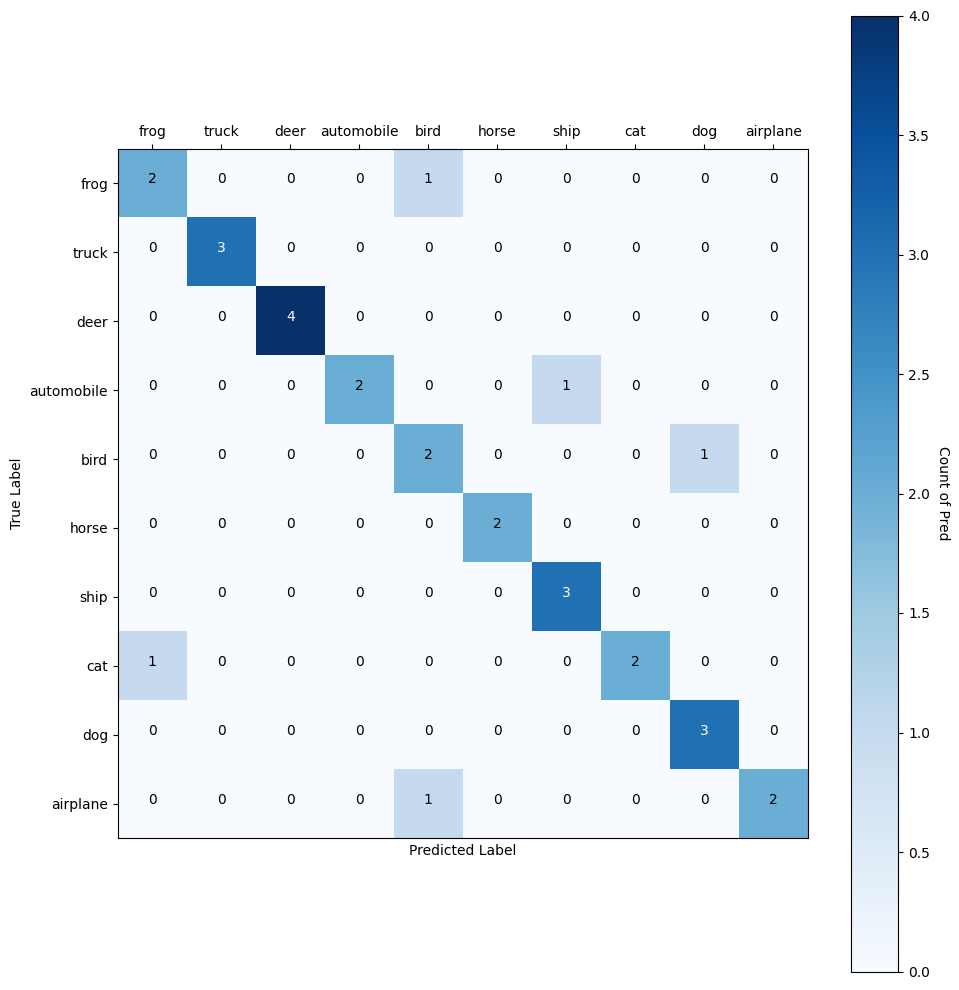

In [61]:
pred = model.predict(elleTest)
y_pred_classes = np.argmax(pred, axis=1)
y_true = np.argmax(testLabels, axis=1)
errors = (y_pred_classes - y_true != 0)

y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = pred[errors]
y_true_errors = y_true[errors]
x_test_errors = testLabels[errors]

cm = confusion_matrix(y_true, y_pred_classes)
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(10,10))
im, cbar = heatmap(cm, classes, classes, ax=ax, cmap=plt.cm.Blues, cbarlabel="Count of Pred")
texts = annotate_heatmap(im, data=cm, threshold = thresh)

fig.tight_layout()
plt.show()

1/1 [==============================] - 0s 22ms/step
1. dog <---------------> 0.5407462120056152
2. deer <---------------> 0.25289228558540344
3. frog <---------------> 0.13995732367038727
4. cat <---------------> 0.037927720695734024
5. bird <---------------> 0.026256665587425232
6. horse <---------------> 0.0018095739651471376
7. truck <---------------> 0.0002795503241941333
8. airplane <---------------> 0.00010237727110506967
9. automobile <---------------> 1.833240457926877e-05
10. ship <---------------> 1.0004553587350529e-05


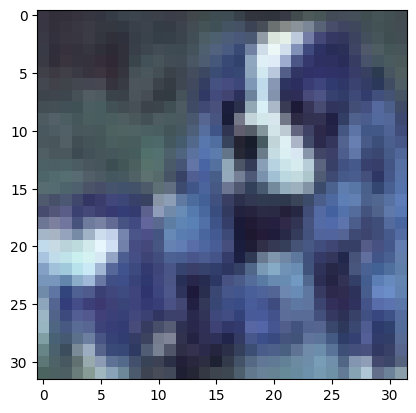

In [65]:
photo_test_getprob = cv2.imread(r'C:\Users\Fatih\Desktop\a\test\test\186.png')
photo_test_getprob = cv2.resize(photo_test_getprob, (32, 32), interpolation=cv2.INTER_AREA)

test_photo = []
test_photo.append(list(photo_test_getprob))
test_photo = np.array(test_photo, dtype=np.float32) / 255
test_predicts = model.predict(test_photo)
test_similarity = test_predicts[0]
test_similarity_sort = test_similarity[np.argsort(-test_similarity)]


plt.imshow(photo_test_getprob)
img = 0
for similarity in test_similarity_sort:
    print(f'{img+1}. {LABELS[np.where(test_similarity==test_similarity_sort[img])[0][0]]} <---------------> {similarity}')
    img=img+1